# Análise exploratória de dados

In [2]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [3]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Descrição dos dados

Este conjunto de dados contém informações sobre clientes bancários e seu status de rotatividade, o que indica se eles saíram do banco ou não. É adequado para explorar e analisar fatores que influenciam a rotatividade de clientes em instituições bancárias e para construir modelos preditivos para identificar clientes em risco de rotatividade.


## 2.1. Dicionário de dados

In [4]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,RowNumber,"Número da linha, usado como identificador sequ...",quantitativa,discreta
1,CustomerId,Identificador único do cliente,quantitativa,discreta
2,Surname,Sobrenome do cliente,qualitativa,nominal
3,CreditScore,Pontuação de crédito do cliente,quantitativa,discreta
4,Geography,País de residência do cliente,qualitativa,nominal
5,Gender,Gênero do cliente (Male/Female),qualitativa,nominal
6,Age,Idade do cliente,quantitativa,discreta
7,Tenure,Tempo de permanência do cliente no banco (em a...,quantitativa,discreta
8,Balance,Saldo da conta do cliente,quantitativa,contínua
9,NumOfProducts,Número de produtos que o cliente possui no banco,quantitativa,discreta


- São 14  variáveis, com 5 quantitativas discretas, 4 qualitativas nominais e e quantitativas continua .

## 3. Perguntas de partida e hipóteses

- Qual é a relação entre a pontuação de crédito (CreditScore) e o saldo da conta (Balance)?

## Existem dados faltantes, se sim quantos e em quais variáveis?

In [5]:
import pandas as pd
from IPython.display import display, Markdown

# Dados da tabela
data = [
    [1, 15634602, 'Hargrave', 619, 'France', 'Female', 42, 2, 0, 1, 1, 1, 101348.88, 1],
    [2, 15647311, 'Hill', 608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58, 0],
    [3, 15619304, 'Onio', 502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57, 1],
    [4, 15701354, 'Boni', 699, 'France', 'Female', 39, 1, 0, 2, 0, 0, 93826.63, 0],
    [5, 15737888, 'Mitchell', 850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1, 0],
    [6, 15574012, 'Chu', 645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71, 1],
    [7, 15592531, 'Bartlett', 822, 'France', 'Male', 50, 7, 0, 2, 1, 1, 10062.8, 0],
    [8, 15656148, 'Obinna', 376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88, 1],
    [9, 15792365, 'He', 501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5, 0],
    [10, 15592389, 'H?', 684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73, 0],
    [11, 15767821, 'Bearce', 528, 'France', 'Male', 31, 6, 102016.72, 2, 0, 0, 80181.12, 0],
    [12, 15737173, 'Andrews', 497, 'Spain', 'Male', 24, 3, 0, 2, 1, 0, 76390.01, 0],
    [13, 15632264, 'Kay', 476, 'France', 'Female', 34, 10, 0, 2, 1, 0, 26260.98, 0],
    [14, 15691483, 'Chin', 549, 'France', 'Female', 25, 5, 0, 2, 0, 0, 190857.79, 0]
]

# Criando o DataFrame
df = pd.DataFrame(data, columns=[
    'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
    'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'
])

# Localizando valores faltantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f" contêm valores faltantes. Além disso, sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    " As próximas análises aqui serão realizadas sem considerar os dados faltantes."
    "\n\n ---"
))

# Removendo linhas com valores faltantes
df.dropna(inplace=True)


Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]` contêm valores faltantes. Além disso, sabemos que temos `0` linhas com valores faltantes. As próximas análises aqui serão realizadas sem considerar os dados faltantes.

 ---

## Qual a distribuição dos dados (variável por variável)?

In [6]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,14.0000,1.400000e+01,14,14.000000,14,14,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
unique,NaN,NaN,14,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hargrave,NaN,France,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.5000,1.566976e+07,NaN,596.857143,NaN,NaN,36.785714,4.500000,69746.690714,1.928571,0.642857,0.428571,92875.448571,0.285714
std,4.1833,6.922611e+04,NaN,134.251118,NaN,NaN,8.294378,2.902254,65070.455484,0.828742,0.497245,0.513553,45680.433474,0.468807
min,1.0000,1.557401e+07,NaN,376.000000,NaN,NaN,24.000000,1.000000,0.000000,1.000000,0.000000,0.000000,10062.800000,0.000000
25%,4.2500,1.562254e+07,NaN,501.250000,NaN,NaN,29.500000,2.000000,0.000000,1.250000,0.000000,0.000000,75302.877500,0.000000
50%,7.5000,1.565173e+07,NaN,578.500000,NaN,NaN,40.000000,4.000000,92912.290000,2.000000,1.000000,0.000000,87003.875000,0.000000
75%,10.7500,1.572822e+07,NaN,674.250000,NaN,NaN,42.750000,6.750000,122894.800000,2.000000,1.000000,1.000000,113584.322500,0.750000


## Qual é a relação entre a pontuação de crédito (CreditScore) e o saldo da conta (Balance)?

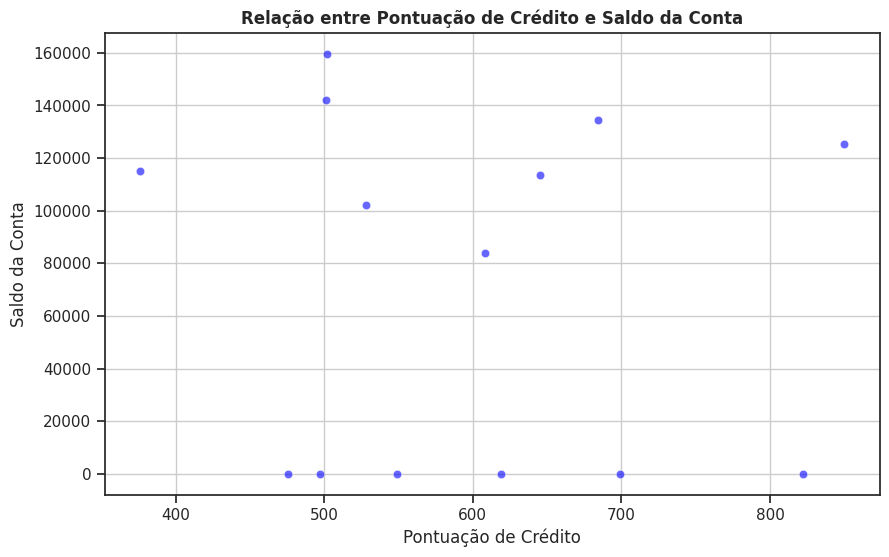

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.title('Relação entre Pontuação de Crédito e Saldo da Conta', fontweight='bold')

# Gráfico de dispersão
sns.scatterplot(data=df, x='CreditScore', y='Balance', alpha=0.6, color='blue')

# Adicionando rótulos e grade
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Saldo da Conta')
plt.grid(True)

# Exibindo o gráfico
plt.show()
